# Affine Geometry

Affine transformations are useful in linear regression, logistic regreesion, and even multi-layer perceptons.. 

Lets understand what linear and affine transformations bring to the table!

To recall, a linear transformation if of the form

$$f  = {\mathbf W}\cdot {\mathbf x}$$, while an affine transformation adds a bias onto it:

$$f  = {\mathbf W}\cdot {\mathbf x} + b.$$

To understand affine transforms we must first understand what linear transformations are doing.

This code and philosophy notebook pretty much follows, quite exactly, Alfredo Canzianis excellent exposition of Affine transforms [here](https://github.com/Atcold/pytorch-Deep-Learning/blob/master/res/plot_lib.py)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from kudzu.layer import Affine, Sigmoid, Tanh, Relu
from kudzu.model import Model

In [4]:
# from https://github.com/Atcold/pytorch-Deep-Learning/blob/master/res/plot_lib.py
BASES = np.concatenate([np.zeros((2,2)), np.eye(2)], axis=0)
print(BASES)
def plot_bases(ax, bases, width=0.04):
    bases[2:] -= bases[:2]
    ax.arrow(*bases[0], *bases[2], width=width, color=(1,0,0), zorder=10, alpha=1., length_includes_head=True)
    ax.arrow(*bases[1], *bases[3], width=width, color=(0,1,0), zorder=10, alpha=1., length_includes_head=True)

[[0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 1.]]


In [5]:
def mat_trans(M, X, bases = BASES, ra = (-5,5)):
    print("Transforming Matrix", M)
    fig, axes = plt.subplots(1, 2, figsize = (12, 5))
    axes[0].scatter(X[:,0], X[:,1], alpha=0.2)
    axes[0]
    axes[0].set_xlim(ra)
    axes[0].set_ylim(ra)
    plot_bases(axes[0], bases)
    Y = X@M.T
    new_bases = bases@M
    axes[1].scatter(Y[:,0], Y[:,1], alpha=0.2);
    axes[1].set_xlim(ra)
    axes[1].set_ylim(ra)
    plot_bases(axes[1], new_bases)
    return Y, new_bases

## Generating some data

Lets generate data from a normal distribution in 2 dimensions. Since its the same normal distribution in each direction, we will pretty much get an isotropic cloud.

In [6]:
X = np.random.randn(1000, 2)
X.shape

(1000, 2)

(-5.0, 5.0)

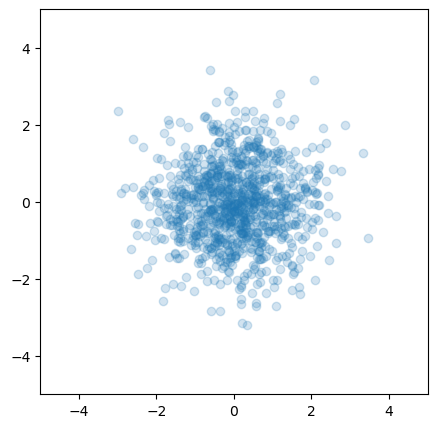

In [7]:
fig, ax = plt.subplots(figsize = (5,5))
ax.scatter(X[:,0], X[:,1], alpha=0.2)
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)

## Linear transformations to 1-D 


We can think of *functions on vectors*. The simplest such function is one that takes every vector to a unique number:

$$f(\overline{v}) = f \left (\begin{pmatrix}
x \\
y
\end{pmatrix}\right ): \mathbb{R}^2 \rightarrow \mathbb{R}$$

A *linear transformation* is a very special such function of the type:

$$f(\overline{v}) = f \begin{pmatrix}
x \\
y
\end{pmatrix} = a\,x + b\, y$$ where $a$ and $b$ are real numbers. 

![right, fit](images/lin_trans_1.jpg)

This transformation maps the origin in 2D to the origin in 1D. It also maps *"equidistant vectors"* in 2D to *equidistant points* in 1D. 

Here, vectors separated by $$\begin{pmatrix}
1 \\
2
\end{pmatrix}$$ land up separated by $a + 2b$ on the real number line.

More formally:

*A transformation $$T$$ is linear if and only if*:

$$T(\bar{u} + \bar{v}) = T(\bar{u}) + T(\bar{v})$$, and

$$T(\lambda\,\bar{u}) = \lambda\,\bar{u}$$.

## Characterization via basis

Remember that we can decompose vectors onto their basis:

$$\bar{v} = \begin{pmatrix}
4 \\
-2
\end{pmatrix} = 4\,\begin{pmatrix}
1 \\
0
\end{pmatrix} + (-2)\,\begin{pmatrix}
0 \\
1
\end{pmatrix} = 4\,\hat{i} - 2\,\hat{j}$$.

![left, fit](images/lintransbasis.jpg)


Then we can write the linear transformation as $f(\bar{v}) = 4\,f(\hat{i}) - 2\,f(\hat{j}) = 4a - 2b$. So we just need to figure *where the basis vectors land* on the real number line.

## Linear Transforms, dot products, and matrix multiplication

![right, fit](images/ltasdot.jpg)

It has probably not escaped your attention that the formula for a linear transformation looks like that for a dot product.

$$f(\overline{v}) = f \begin{pmatrix}
x \\
y
\end{pmatrix} = a\,x + b\, y = 
\begin{pmatrix}
a \\
b
\end{pmatrix} \cdot
\begin{pmatrix}
x \\
y
\end{pmatrix}
$$

### Dot Products and vectors

In other words, for every linear transformation, there is a corresponding vector 

$$\bar{u} = \begin{pmatrix}
a \\
b
\end{pmatrix}.$$

which encodes the linear transformation!


So, dot product then is a transformation $$T(\overline{v}) = T \begin{pmatrix}
x \\
y
\end{pmatrix} = a\,x + b\, y = 
\begin{pmatrix}
a \\
b
\end{pmatrix} \cdot
\begin{pmatrix}
x \\
y
\end{pmatrix}$$

### Dot products as matrix multiplication

If the vector $$\bar{T} = \begin{pmatrix}
a \\
b
\end{pmatrix}$$ corresponding to the linear transformation is transposed from a $2 \times 1$ *column vector* to a $1 \times 2$ matrix (also called a *row vector*), then we can consider the transformation or dot product as the multiplication of a $1 \times 2$ matrix with a $2 \times 1$ matrix, thus giving us a $1 \times 1$ number or scalar:

$$T(\overline{v}) = 
\begin{pmatrix}
a \\
b
\end{pmatrix} \cdot
\begin{pmatrix}
x \\
y
\end{pmatrix} = \begin{pmatrix}
a & b 
\end{pmatrix}\begin{pmatrix}
x \\
y
\end{pmatrix} = a\,x + b\, y $$

Notice I have **transposed** the column vector into a row vector to carry out the dot product into a matrix multiplication. This is hidden in the numpy implementation for dot products, where you can `@` or `np.dot` a vector (column vector) without transposing with another one. 

In [8]:
a = np.array([1,2])
b = np.array([3,4])
a@b, a.T@b

(11, 11)

## Linear Transforms between spaces

There is no reason a function needs to take in a vector and give us a single number. 

It can be to a vector of the same or different dimension. 

And furthermore, lets say that it is a *linear transform*, by which we mean that the origin in the input space is mapped to the origin in the target space, and that "equidistant" points in the input space are "equidistant" in the target space"

Lets recall the formal definition to keep ourselves straight:

*A transformation $T$ is linear if and only if*:

$$T(\bar{u} + \bar{v}) = T(\bar{u}) + T(\bar{v})$$, and

$$T(\lambda\,\bar{u}) = \lambda\,\bar{u}$$.

We might have $$T: \mathbb{R^2} \rightarrow \mathbb{R^2}$$. 


$$T(\overline{v}) = T \begin{pmatrix}
x \\
y
\end{pmatrix} =  
\begin{pmatrix}
ax + by \\
cx + dy 
\end{pmatrix}$$

$$T(\overline{v}) = \begin{pmatrix} \begin{pmatrix}
a \\
b
\end{pmatrix} \cdot
\begin{pmatrix}
x \\
y 
\end{pmatrix} \\
\begin{pmatrix}
c \\
d
\end{pmatrix} \cdot
\begin{pmatrix}
x \\
y 
\end{pmatrix} 
\end{pmatrix} $$.


Notice that this has the **same structure as the dot product** stuff we just did.

As another example, we might have $$T: \mathbb{R^2} \rightarrow \mathbb{R^3}$$. 

$$T(\overline{v}) = T \begin{pmatrix}
x \\
y
\end{pmatrix} =  
\begin{pmatrix}
ax + by \\
cx + dy \\
ex + dy
\end{pmatrix}$$

$$T(\overline{v}) = \begin{pmatrix} \begin{pmatrix}
a \\
b
\end{pmatrix} \cdot
\begin{pmatrix}
x \\
y 
\end{pmatrix} \\
\begin{pmatrix}
c \\
d
\end{pmatrix} \cdot
\begin{pmatrix}
x \\
y 
\end{pmatrix} \\
\begin{pmatrix}
e \\
f
\end{pmatrix} \cdot
\begin{pmatrix}
x \\
y 
\end{pmatrix}
\end{pmatrix} $$.

You can think of each component of the new vector being a *linear combination* of the components of the old vector, or the result of a *dot product* of a vector **for that** component, with the old vector.



## Linear Transform as matrix multiplication


$$f(\overline{v}) = \begin{pmatrix} \begin{pmatrix}
a \\
b
\end{pmatrix} \cdot
\begin{pmatrix}
x \\
y 
\end{pmatrix} \\
\begin{pmatrix}
c \\
d
\end{pmatrix} \cdot
\begin{pmatrix}
x \\
y 
\end{pmatrix} \\
\begin{pmatrix}
e \\
f
\end{pmatrix} \cdot
\begin{pmatrix}
x \\
y 
\end{pmatrix}
\end{pmatrix} = 
\begin{pmatrix}
a & c & e\\
b & d & f
\end{pmatrix} \cdot
\begin{pmatrix}
x \\
y 
\end{pmatrix}=  
\begin{pmatrix}
a & b\\
c & d\\
e & f 
\end{pmatrix} 
\begin{pmatrix}
x \\
y 
\end{pmatrix} = 
\begin{pmatrix}
ax + by \\
cx + dy \\
ex + dy
\end{pmatrix}$$

Similarly *any linear transformation can be thought of as matrix multiplication*. We just horizontally stacked the "vectors" corresponding to the transformations of the individual components next to each other in the dot product, and ***then transposed the matrix*** so formed to do the linear transformation!

In Numpy you now need to be careful that dimensions match. We did this in the `mat_trans` function above.

In [8]:
unit1 = np.array([1,0])
unit2 = np.array([0,1])

In [9]:
M = np.random.randn(2,2)
M

array([[-0.60618728,  0.4072828 ],
       [-0.60692945, -2.33028195]])

In [10]:
unit1.shape, M.shape

((2,), (2, 2))

Vectors act as row or column vectors, so be careful

In [11]:
M@unit1 # M 2 x 2, unit1 as column

array([-0.60618728, -0.60692945])

In [12]:
unit1@M.T # unit 1 as row, M.T the appropriate column

array([-0.60618728, -0.60692945])

In [13]:
unit1@M #WRONG ANSWER unit is 1x2, M 2x2

array([-0.60618728,  0.4072828 ])

## Back to Geometry

Lets understand with a 2D-2D example (so we can easily visualize) so $$T: \mathbb{R^2} \rightarrow \mathbb{R^2}$$...

$$T(\overline{v}) = T \begin{pmatrix}
x \\
y
\end{pmatrix} =  
\begin{pmatrix} 
\begin{pmatrix}
a \\
b
\end{pmatrix} \cdot
\begin{pmatrix}
x \\
y 
\end{pmatrix} \\
\begin{pmatrix}
c \\
d
\end{pmatrix} \cdot
\begin{pmatrix}
x \\
y 
\end{pmatrix} 
\end{pmatrix}  = \begin{pmatrix}
a & c\\
b & d
\end{pmatrix} \cdot
\begin{pmatrix}
x \\
y 
\end{pmatrix} = \begin{pmatrix}
a & b\\
c & d
\end{pmatrix} 
\begin{pmatrix}
x \\
y 
\end{pmatrix} $$

$$T(\overline{v}) = \begin{pmatrix}
ax + by \\
cx + dy 
\end{pmatrix} $$. 

There are two ways to think of these transformations geometrically.


1. We think of transformations as operations between spaces (we have seen this), but 
2. transformations can also be thought of as movement in a space..the changing of a space.

Since Matrix multiplication encodes a linear transformation, the geometry of linear transforms is the geometry of matrix multiplication. Remember, linear transformations:

- preserve the origin
- relative distances in the initial space are preserved in the target space

Now, let us think of the notion of *transformation* as *movement*. How is the initial space itself transformed by the linear transform or matrix multiplication?

Consider the linear transformation:  

$$T\begin{pmatrix}
x \\
y 
\end{pmatrix} = \begin{pmatrix}
x - 2y\\
2x + y
\end{pmatrix} = \begin{pmatrix}
1 & -2\\
2 & 1
\end{pmatrix} \begin{pmatrix}
x\\
y
\end{pmatrix} = \begin{pmatrix}
1 & 2\\
-2 & 1
\end{pmatrix} \cdot \begin{pmatrix}
x\\
y
\end{pmatrix}$$

### Back to the Basis


Decomposing a vector on its unit vector basis:  

$$ \bar{v} = \begin{pmatrix}
x \\
y 
\end{pmatrix} = x\begin{pmatrix}
1 \\
0 
\end{pmatrix} + y\begin{pmatrix}
0 \\
1 
\end{pmatrix}$$

so $ \bar{v}  = x\hat{i} + y\hat{j}$. We can now decompose 
the transformation:

$$T(\bar{v}) = T\begin{pmatrix}
x \\
y 
\end{pmatrix} = \begin{pmatrix}
a & c\\
b & d
\end{pmatrix}\cdot\begin{pmatrix}
x\\
y
\end{pmatrix}$$ 

in this way: $T(\bar{v}) = x\,T(\hat{i}) + y\,T(\hat{j})$.
The effects on the basis vectors can be obtained:  

$$T(\hat{i}) = \begin{pmatrix}
a & c\\
b & d
\end{pmatrix} \cdot
\begin{pmatrix}
1 \\
0 
\end{pmatrix} = \begin{pmatrix}
a & b\\
c & d
\end{pmatrix} 
\begin{pmatrix}
1 \\
0 
\end{pmatrix} = \begin{pmatrix}
a \\
c 
\end{pmatrix}$$ 

$$T(\hat{j}) = \begin{pmatrix}
a & c\\
b & d
\end{pmatrix} \cdot
\begin{pmatrix}
1 \\
0 
\end{pmatrix} = \begin{pmatrix}
a & b\\
c & d
\end{pmatrix} 
\begin{pmatrix}
0 \\
1 
\end{pmatrix} = \begin{pmatrix}
b \\
d 
\end{pmatrix}$$.

For $$T\begin{pmatrix}
x \\
y 
\end{pmatrix} = \begin{pmatrix}
x - 2y\\
2x + y
\end{pmatrix} = \begin{pmatrix}
1 & -2\\
2 & 1
\end{pmatrix} \begin{pmatrix}
x\\
y
\end{pmatrix}$$:

we then have $$\,\,T(\hat{i}) = \begin{pmatrix}
1 \\
2 
\end{pmatrix}\,\, and \,\,T(\hat{j}) = \begin{pmatrix}
-2 \\
1
\end{pmatrix}\,$$.

Thus, when you **multiply a matrix and a vector**, the *columns of the matrix are the transformations that the unit basis vectors undergo*, i.e. **where the unit vectors land up in space**. 

$$T\begin{pmatrix}
x \\
y 
\end{pmatrix} = \begin{pmatrix}
a & b\\
c & d
\end{pmatrix} 
\begin{pmatrix}
x \\
y 
\end{pmatrix} = x \begin{pmatrix}
a \\
c 
\end{pmatrix} + y \begin{pmatrix}
b \\
d 
\end{pmatrix}$$.


### How our space changes

*Scale the transformed unit vectors by the initial vector's co-ordinates and add*. In our example:

$$T\begin{pmatrix}
3 \\
-1 
\end{pmatrix} = \begin{pmatrix}
1 & -2\\
2 & 1
\end{pmatrix} 
\begin{pmatrix}
3 \\
-1 
\end{pmatrix} = 3 \begin{pmatrix}
1 \\
2 
\end{pmatrix} - 1 \begin{pmatrix}
-2 \\
1 
\end{pmatrix} = \begin{pmatrix}
5 \\
5 
\end{pmatrix}$$.

![left, fit](images/lintransonbasis.jpg)


This thinking can be applies to all the grid-lines in our co-ordinate system.

$T$ rotates the $y=0$ line ($x$-axis) and the $y=1$ line, but relative distance preservation means that these must be parallel in the target space. Similarly the $x=constant$ lines (parallel to $y$-axis). The unit square on the left (OACB) in the positive quadrant is mapped to the similarly labeled, rotated, larger square in the target space. The vector $\bar{v}$ is thus totated and scaled as well. General linear transformations can apply shear as well, where the squares will be converted to parallelograms.

![inline](images/lintransongrid.jpg)


## Transformations of data and our unit vector

Armed with our knowledge that matrix multiplication encodes linear transformation. we can go look at various transformations.

From this point we'll use the matrix multiplication notation only, so

$$T\begin{pmatrix}
x \\
y 
\end{pmatrix} = \begin{pmatrix}
ax + by \\
cx + dy 
\end{pmatrix} = \begin{pmatrix}
a & c\\
b & d
\end{pmatrix} \cdot \begin{pmatrix}
x \\
y 
\end{pmatrix}  = \begin{pmatrix}
a & b\\
c & d
\end{pmatrix} 
\begin{pmatrix}
x \\
y 
\end{pmatrix} = x \begin{pmatrix}
a \\
c 
\end{pmatrix} + y \begin{pmatrix}
b \\
d 
\end{pmatrix}$$.

will simply be represented by the matrix:

$$\begin{pmatrix}
a & b\\
c & d
\end{pmatrix}. $$

Let us look at some different matrices:

In [14]:
M1 = np.array([[1.2,0],[0,2]])

This is a **scaling** transformation

Transforming Matrix [[1.2 0. ]
 [0.  2. ]]


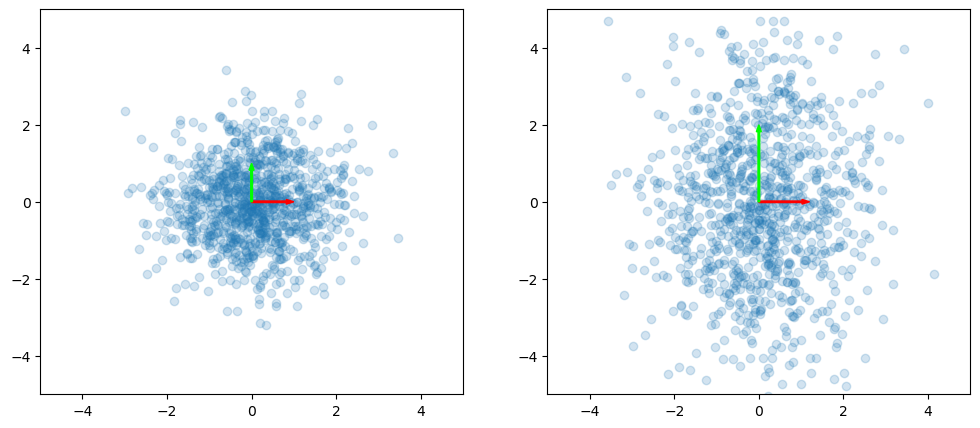

In [15]:
mat_trans(M1, X);

Look at the stretching impact on the unit vectors.

Here is with only off-diagonal elements..this **rotates and mirrors** the vectors

Transforming Matrix [[0.  1.2]
 [2.  0. ]]


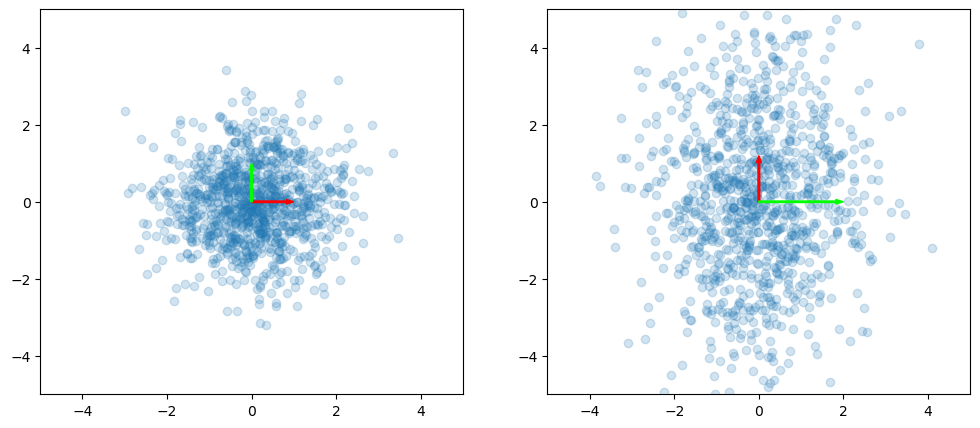

In [16]:
M2 = np.array([[0,1.2],[2,0]])
mat_trans(M2, X);

And here is a **pure rotation**

Transforming Matrix [[0.5       0.8660254]
 [0.8660254 0.5      ]]


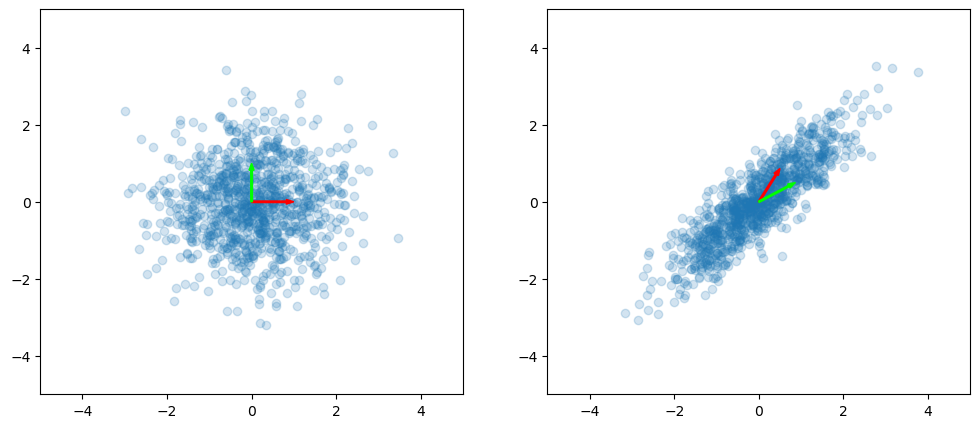

In [17]:
theta = np.pi/3
c, s = np.cos(theta), np.sin(theta)
M3 = np.array([[c,s],[s,c]])
mat_trans(M3, X);

Here is an example of shear:

Transforming Matrix [[1.   1.23]
 [0.   1.  ]]


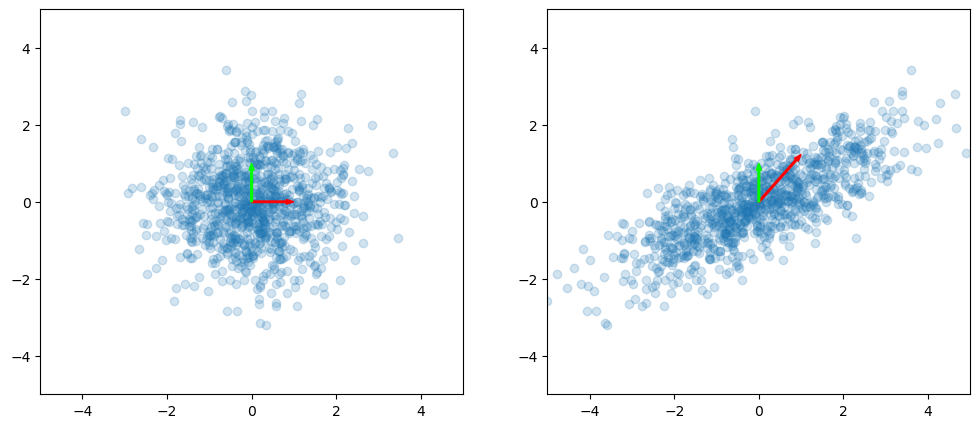

In [20]:
sf = 1.23
M4 = np.array([[1,sf],[0,1]])
mat_trans(M4, X);

This is a **full random 2x2 matrix** and thus has some shear built in.

(2, 2)
Transforming Matrix [[ 0.6490345  -1.46668985]
 [-0.54050717 -0.03237984]]


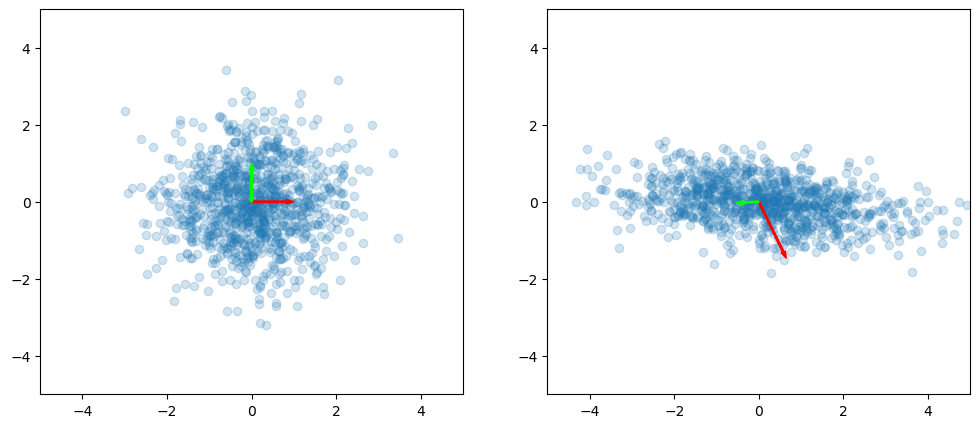

In [21]:
# M a 2x2 matrix
M = np.random.randn(2,2)
print(M.shape)
mat_trans(M, X);

These images help us see what happens to our data on a linear transformation, encoded as a matrix multiplication. 

## Understanding these transforms with the SVD

You can use Singular Value Decompositions to split an arbitrary matrix into a rotation, followed by a scaling, an then another rotation. Once again we want to see the impact of these on the unit vectors.

Transforming Matrix [[ 0.6490345  -1.46668985]
 [-0.54050717 -0.03237984]]


(array([[ 1.48613854,  0.13467702],
        [-0.93173202,  0.97793253],
        [ 0.06161414, -0.18198017],
        ...,
        [-2.53583028,  0.39919648],
        [ 1.65099986, -0.26626555],
        [ 0.72381892, -1.00429344]]),
 array([[ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.6490345 , -1.46668985],
        [-0.54050717, -0.03237984]]))

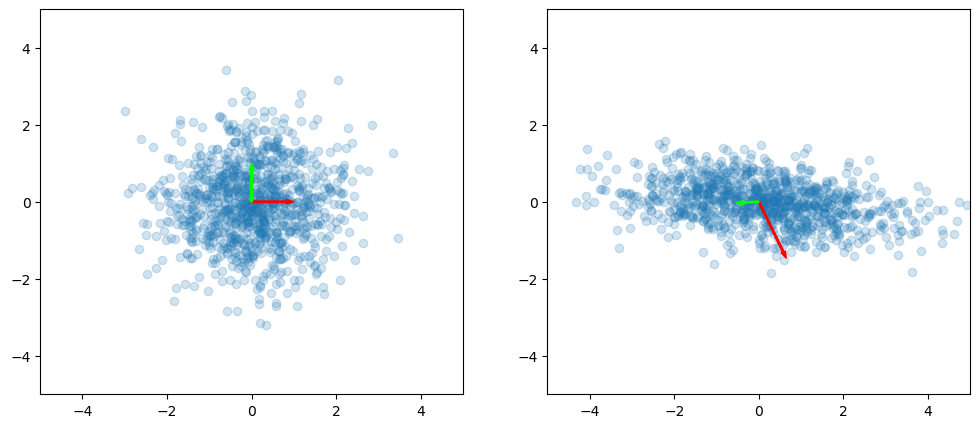

In [22]:
mat_trans(M, X)

In [23]:
svd = np.linalg.svd
U, S, V = svd(M)

First a rotation.

Transforming Matrix [[ 0.44156362  0.89722994]
 [-0.89722994  0.44156362]]


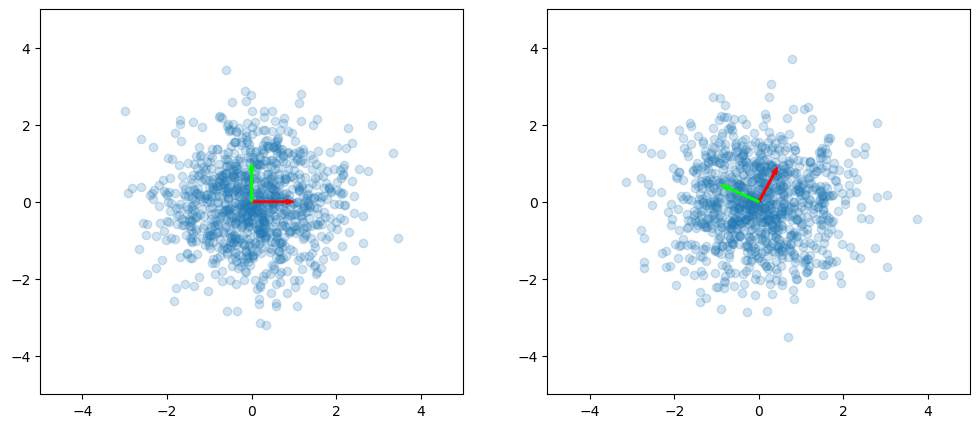

In [24]:
X1,nb = mat_trans(V.T, X)

Followed by a scaling of the unit vectors, and thus the vectors to any points.

Transforming Matrix [[1.61619901 0.        ]
 [0.         0.50350978]]


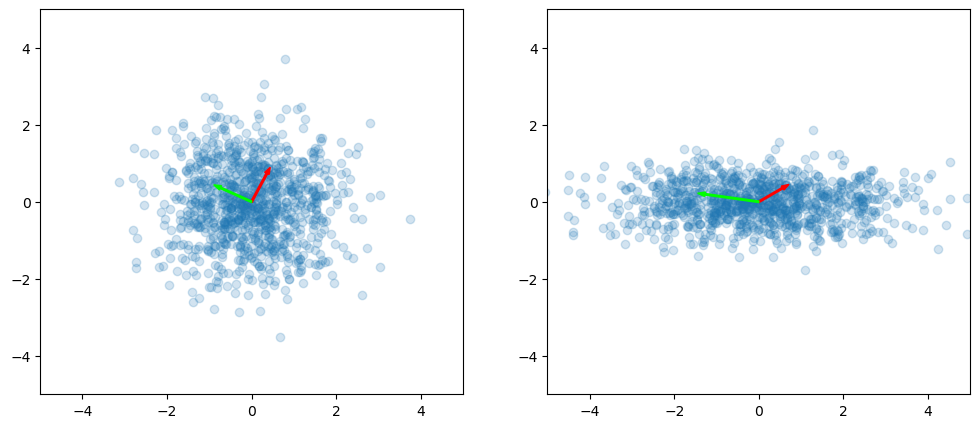

In [25]:
X2, nb2 = mat_trans(np.eye(2)*S, X1, bases=nb)

Followed by another rotation.

Transforming Matrix [[ 0.99155368 -0.12969699]
 [-0.12969699 -0.99155368]]


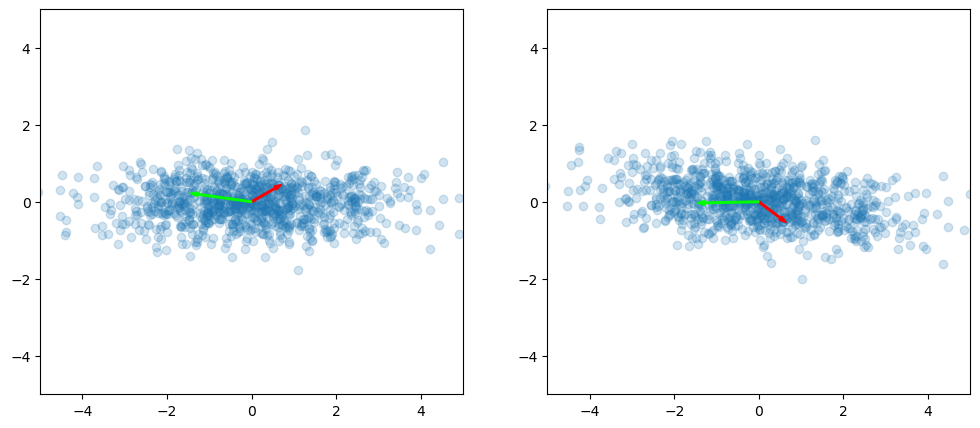

In [26]:
X3, nb3 = mat_trans(U, X2, bases=nb2)

Lets investigate the geometry of our affine transformations a bit more:

## Affine Transformations and non-linearities

Ok, now that we understand how out space stretches, shears and rotates, we can move from linear transformations to Affine Transformations by simply adding bias.

In [27]:
def mat_trans_bias(M, bias, X, bases = BASES, ra = (-5,5)):
    print("Transforming Matrix", M)
    fig, axes = plt.subplots(1, 2, figsize = (12, 5))
    axes[0].scatter(X[:,0], X[:,1], alpha=0.2)
    axes[0]
    axes[0].set_xlim(ra)
    axes[0].set_ylim(ra)
    plot_bases(axes[0], bases)
    Y = X@M.T + bias # add bias.
    new_bases = bases@M + bias
    axes[1].scatter(Y[:,0], Y[:,1], alpha=0.2);
    axes[1].set_xlim(ra)
    axes[1].set_ylim(ra)
    plot_bases(axes[1], new_bases)
    return Y, new_bases

### Adding a Bias

Transforming Matrix [[ 0.6490345  -1.46668985]
 [-0.54050717 -0.03237984]]


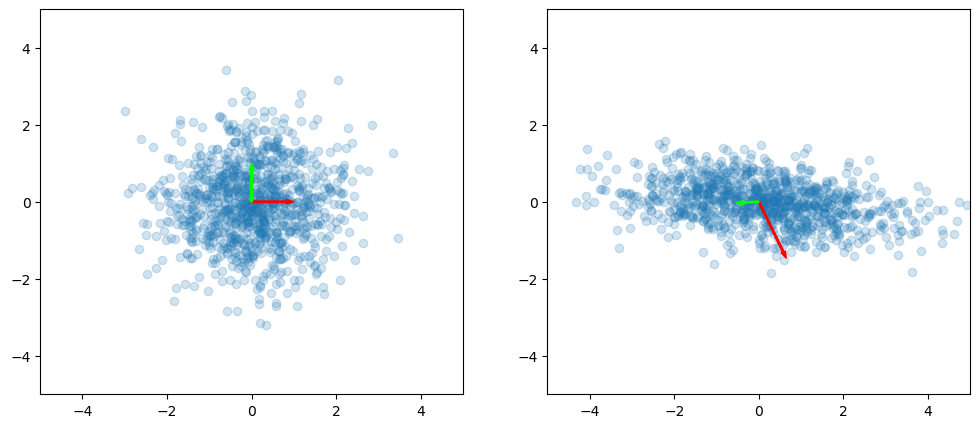

In [28]:
mat_trans(M, X);

Transforming Matrix [[ 0.6490345  -1.46668985]
 [-0.54050717 -0.03237984]]


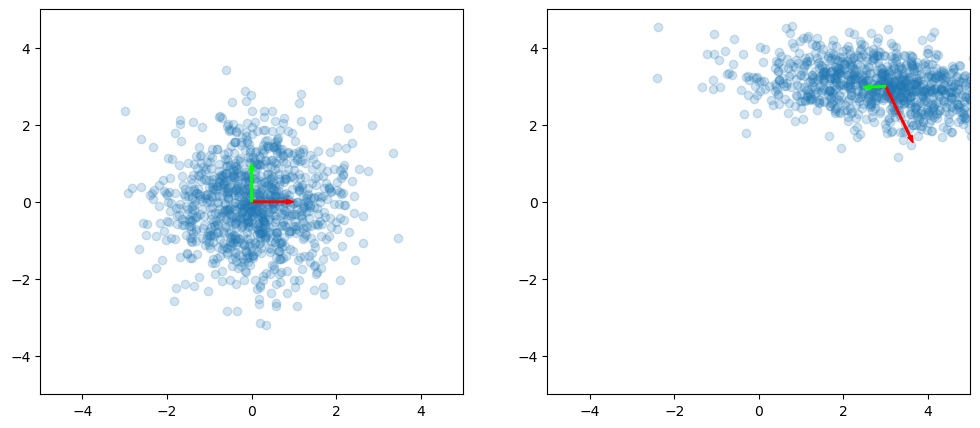

In [29]:
mat_trans_bias(M, 3, X);

So the change to an affine is quite simpe..it just takes us off into some other region of the space. And in the transform our space picture, it shifts the origin of our space.

### Non-linearities

In Neural networks we usuall follow an affine transformation by a nonlinearity. Here are some:

In [30]:
from kudzu.layer import tanh, sigmoid, relu

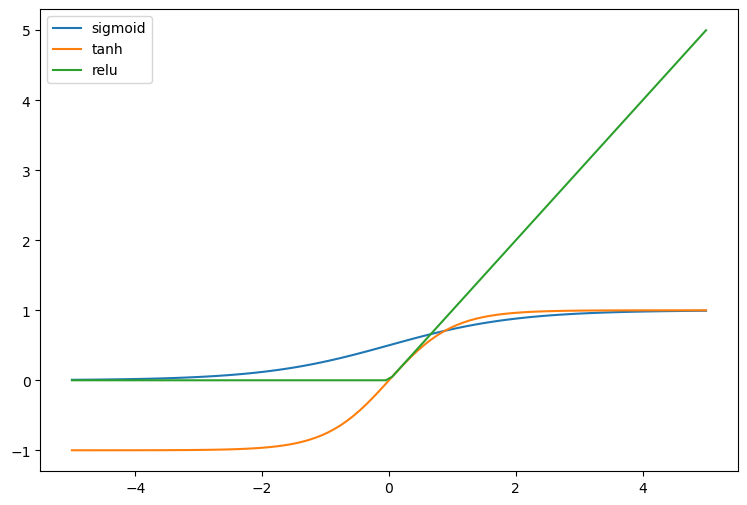

In [31]:
xgrid = np.linspace(-5, 5, 100)
plt.figure(figsize = (9,6))
plt.plot(xgrid, sigmoid(xgrid), label="sigmoid");
plt.plot(xgrid, tanh(xgrid), label="tanh");
plt.plot(xgrid, relu(xgrid), label="relu")
plt.legend();

What do these non-linearities do to our data? Or more precisely, to the space in which our data lives?

To answer this question, lets use **untrained**, simple neural network models.

In [32]:
def mat_model(model, X, bases = BASES, ra = (-5,5)):
    print("Transforming Matrix", M)
    fig, axes = plt.subplots(1, 2, figsize = (12, 5))
    axes[0].scatter(X[:,0], X[:,1], alpha=0.05)
    axes[0]
    axes[0].set_xlim(ra)
    axes[0].set_ylim(ra)
    plot_bases(axes[0], bases)
    Y = model(X)
    new_bases = model(bases)
    axes[1].scatter(Y[:,0], Y[:,1], alpha=0.05);
    axes[1].set_xlim(ra)
    axes[1].set_ylim(ra)
    plot_bases(axes[1], new_bases)
    return Y, new_bases

Lets make sure affine transforms work in this new mechanism:

In [33]:
model0 = Model([Affine("affine", 2, 2)])

xavier


In [34]:
model0.layers[0].params

{'w': array([[-0.45808757,  1.71306606],
        [ 0.12987013, -1.07099227]]),
 'b': array([0., 0.])}

Transforming Matrix [[ 0.6490345  -1.46668985]
 [-0.54050717 -0.03237984]]


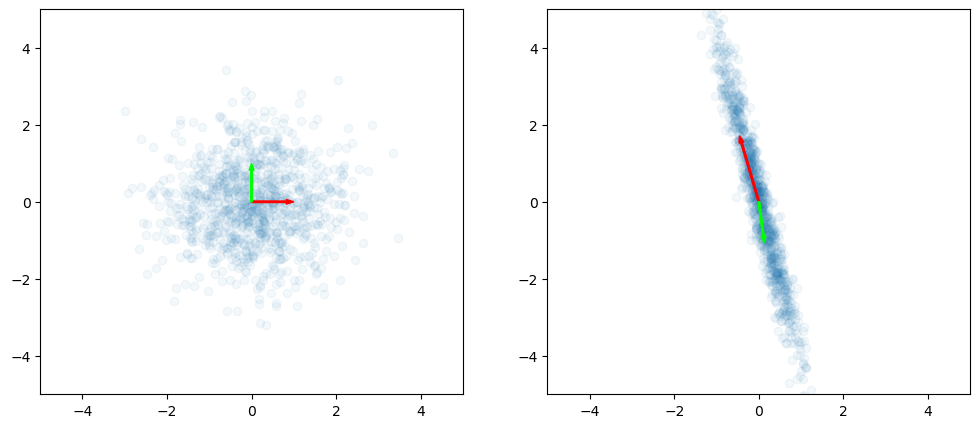

In [35]:
Xnew, bnew = mat_model(model0, X)

Super! We'll now create a new model with only a tanh layer and see what it does to our original dataset, and dataset after the affine transform.

In [36]:
model_tanh = Model([Tanh("tanh")])

Transforming Matrix [[ 0.6490345  -1.46668985]
 [-0.54050717 -0.03237984]]


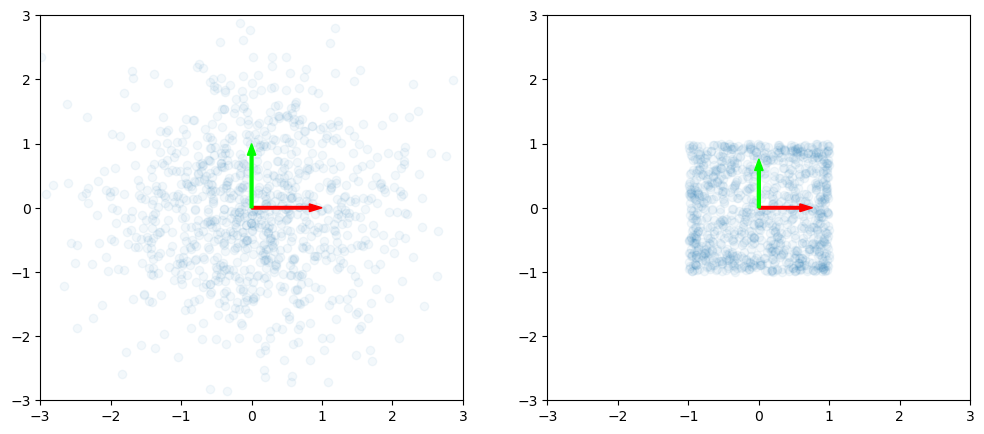

In [37]:
mat_model(model_tanh, X, bases=BASES, ra = (-3,3));

Transforming Matrix [[ 0.6490345  -1.46668985]
 [-0.54050717 -0.03237984]]


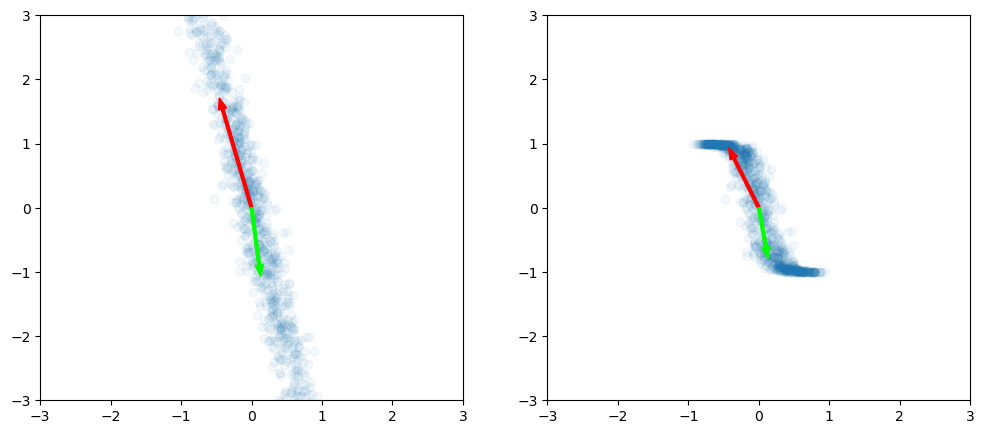

In [38]:
mat_model(model_tanh, Xnew, bases=bnew, ra = (-3,3));

As you would expect, all the activations are now confined to being between -1 and 1. The bases vectors dont change as this is a 1:1 transform. But there is a clustering along the edge since `tanh(x)` is very close to 1 or -1 outside the 2.5 to -2.5 range in x.

Lets try `relu`.

Transforming Matrix [[ 0.6490345  -1.46668985]
 [-0.54050717 -0.03237984]]


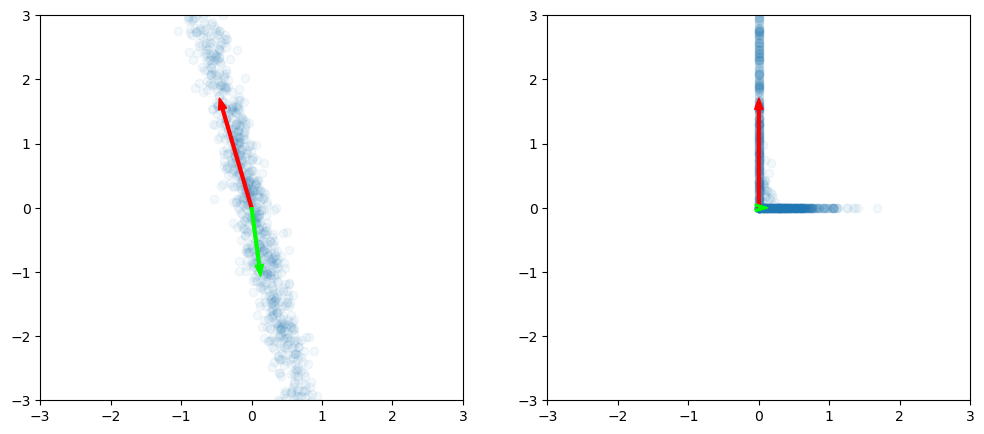

In [39]:
model_relu = Model([ Relu("relu")])
mat_model(model_relu, Xnew, bases=bnew, ra = (-3,3));

As you expect, relu makes everything positive. And stuff clusters at 0 become all the negative points get mapped there...

Lets try `sigmoid` now. This function takes us between 0 and 1, so the data is moved there..but it is softer than `tanh` for the range of our original data, so the clustering is not quite so bad.

Transforming Matrix [[ 0.6490345  -1.46668985]
 [-0.54050717 -0.03237984]]


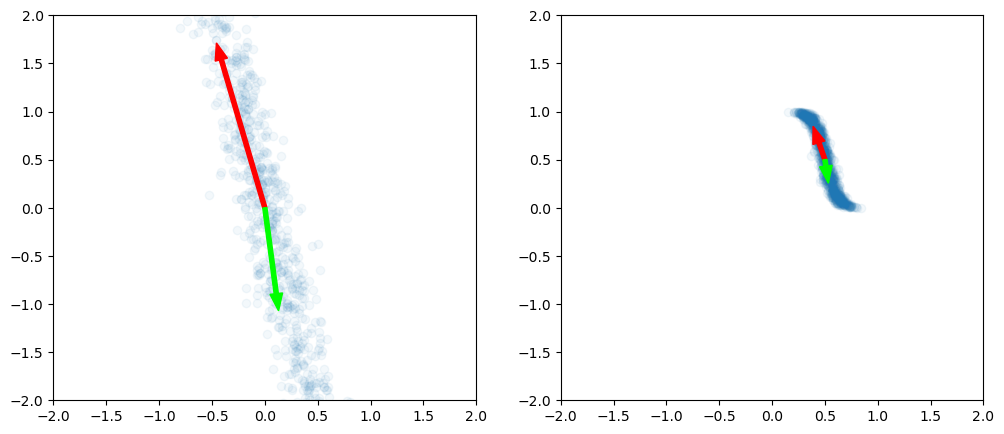

In [40]:
model_sigmoid = Model([Sigmoid("sigmoid")])
mat_model(model_sigmoid, Xnew, bases=bnew, ra = (-2,2));

### With negative bias and non-linearity

Lts add some negative bias in by hand. We are doing this to make our data negative, and see the impact of this on our non-linearities

Transforming Matrix [[ 0.6490345  -1.46668985]
 [-0.54050717 -0.03237984]]


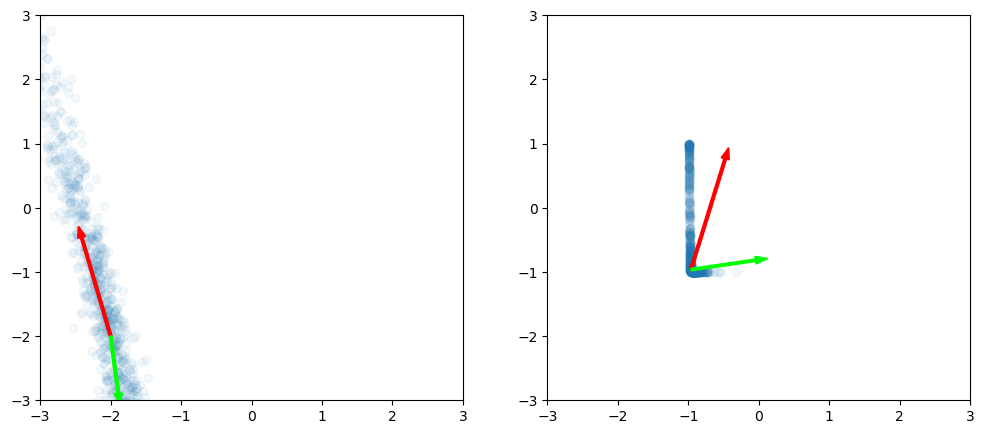

In [41]:
# add some bias by hand
Xnew2 = Xnew - 2
bnew2 = bnew - 2
mat_model(model_tanh, Xnew2, bases=bnew2, ra = (-3,3));

With all the data having become more negative, a good portion of it is now mapped to -1. What if we use relu?

Transforming Matrix [[ 0.6490345  -1.46668985]
 [-0.54050717 -0.03237984]]


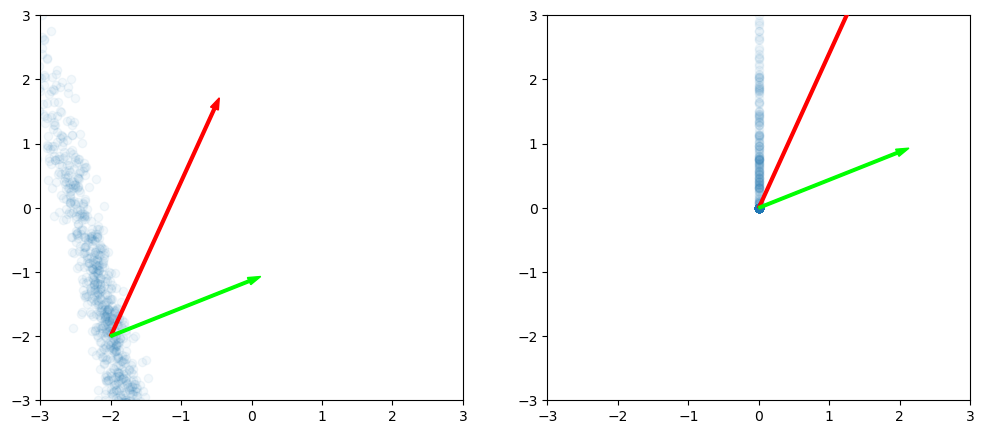

In [42]:
mat_model(model_relu, Xnew2, bases=bnew2, ra = (-3,3));

Asmost all activations went to 0. Not good!

Transforming Matrix [[ 0.6490345  -1.46668985]
 [-0.54050717 -0.03237984]]


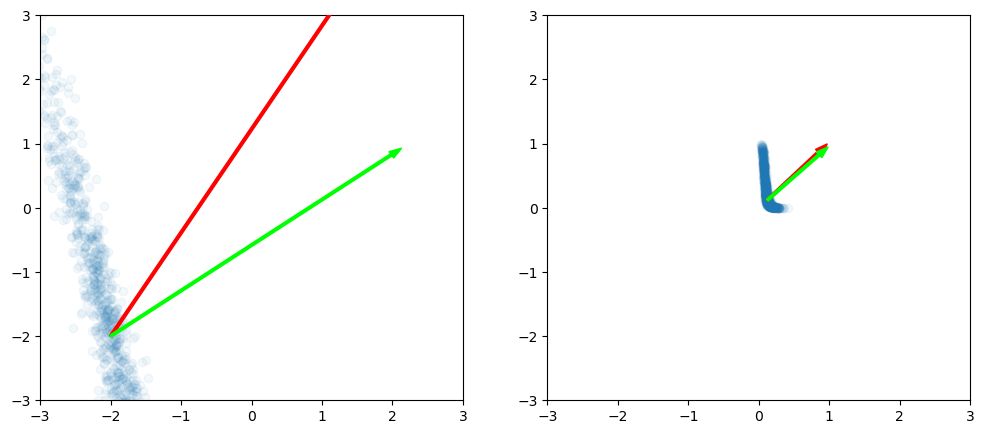

In [43]:
mat_model(model_sigmoid, Xnew2, bases=bnew2, ra = (-3,3));

Huge focus around 0 as well.

## A Complex model and embedding layers

Lets try a more complex model. We have 2 inputs, one hiden layer with 5 neurons, and an output layer with 2 activations.

In [44]:
model_complex = Model([Affine("first", 2, 5), Tanh("tanh"), Affine("embedding", 5, 2)])

xavier
xavier


In [45]:
model_complex.layers[0].params

{'w': array([[-0.5805662 ,  0.07084852, -0.08874351,  0.9872995 , -0.02878916],
        [ 0.01831433,  0.06503515,  0.46345092, -0.45847924,  0.14111859]]),
 'b': array([0., 0., 0., 0., 0.])}

Lets add in some random bias. Notice that there are 5 affine transformations.

In [46]:
model_complex.layers[0].params['b'] = np.random.randn(5)
model_complex.layers[0].params

{'w': array([[-0.5805662 ,  0.07084852, -0.08874351,  0.9872995 , -0.02878916],
        [ 0.01831433,  0.06503515,  0.46345092, -0.45847924,  0.14111859]]),
 'b': array([ 0.4350241 ,  0.6112256 , -1.12776458, -1.76405921, -0.20930261])}

We map the output layer to 2D because (a) we dont care about cost functions as we are not training anything and more importantly (b) we want to visualize how our data has fot transformed.

Transforming Matrix [[ 0.6490345  -1.46668985]
 [-0.54050717 -0.03237984]]


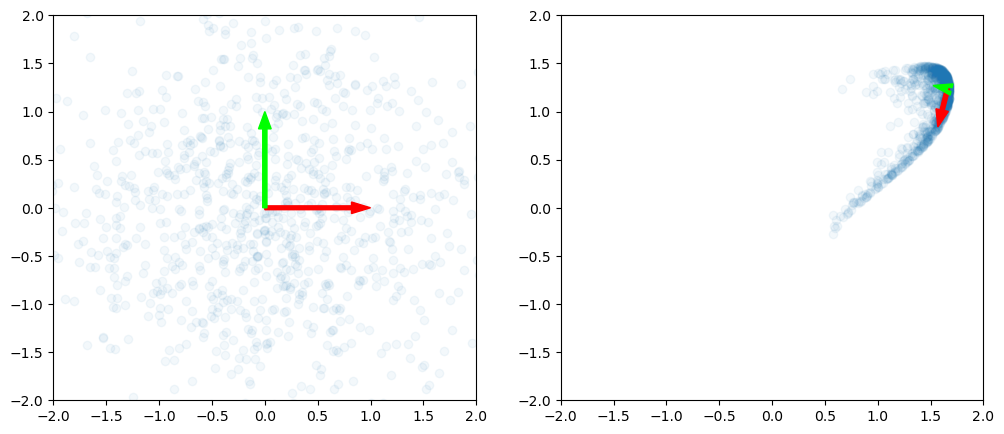

In [47]:
mat_model(model_complex, X, ra = (-2,2));

## The importance of geometry

By assigning colors to points we can see that the stretching and squeezing and translating that the neural networks do can lead to separation or meging of the colors..or in other words, separations in regions of space that were not separated to start. This is critical for classification.

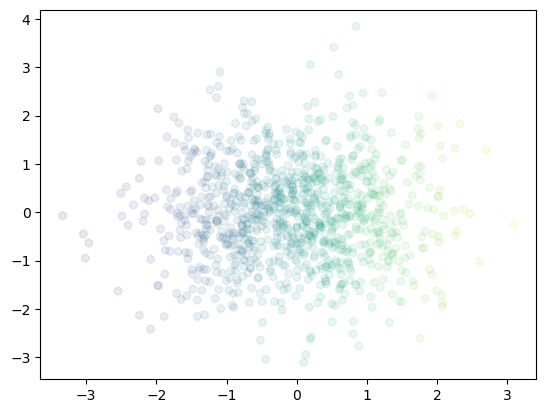

In [48]:
n_points = 1000
J = np.random.randn(n_points, 2)
colors = J[:, 0]
plt.scatter(J[:,0],J[:,1], c=colors, alpha=0.1, s=30)


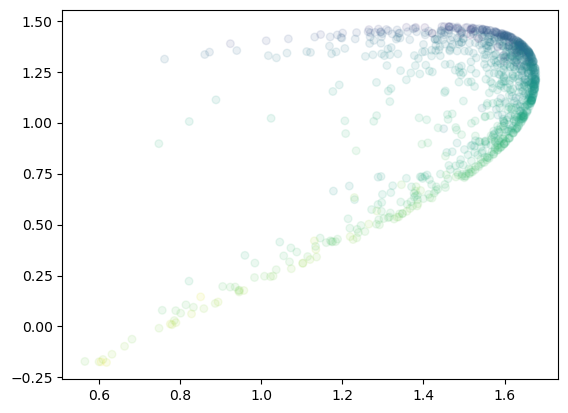

In [49]:
K  = model_complex(J)
plt.scatter(K[:,0],K[:,1], c=colors, alpha=0.1, s=30)